
# **HATE SPEECH DETECTION OF INSTAGRAM COMMENTS AND REELS**

---

---


1. The project aims to develop a hate speech detection system for Instagram comments and reels.
2. Utilizing natural language processing and machine learning, it identifies and flags potentially offensive content.
3. Training on a diverse dataset helps the model distinguish between hate speech and legitimate expression.
4. The goal is to enhance online safety by automating the identification of harmful language.
5. Continuous refinement ensures adaptability to evolving language trends and emerging forms of online abuse.

# **Installing libraries**

---



---
NLTK, which stands for Natural Language Toolkit, is a powerful Python library for working with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources, such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and more.

##**1. How this library helps ?**

---
* `Import NLTK:` Incorporate NLTK into Python to access its language processing
tools.

* `Download Resources:` Acquire linguistic data and models necessary for various tasks.

* `Tokenization:` Break down raw text into smaller units like words or sentences.

* `Text Processing:` Utilize NLTK for tasks such as stemming, part-of-speech tagging, and named entity recognition.

* `Apply NLTK Features:` Leverage NLTK for advanced applications like sentiment analysis and text classification, enabling the extraction of meaningful insights from text data.



In [ ]:
pip install nltk

# Explanation

---



---

* `stopwords:` nltk.download('stopwords') retrieves a set of common words (e.g., "the," "is," "and") that are often excluded from text analysis tasks to focus on more meaningful content.

* `wordnet:` nltk.download('wordnet') downloads the WordNet lexical database, providing access to a structured collection of words and their relationships, useful for tasks like synonym identification and semantic analysis.

* `punkt:` nltk.download('punkt') downloads the Punkt tokenizer models, enhancing NLTK's capabilities in tasks like sentence and word tokenization for various natural language processing applications.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Uploading Un - Pre-processed file**

---



---



In [ ]:
from google.colab import files
uploaded=files.upload()

Saving HateSpeech_dataset_AIES_2.csv to HateSpeech_dataset_AIES_2.csv


# **Preprocesing steps**

---



---



* `Text Cleaning:` Remove special characters, URLs, mentions, and non-alphanumeric characters. You might want to replace emoticons or special characters with their textual meanings.

* `Lowercasing:` Convert all text to lowercase to ensure consistency.

* `Tokenization:` Split the text into individual words or tokens.

* `Removing Stopwords:` Exclude common words that don't contribute much to the meaning.

* `Stemming or Lemmatization:` Reduce words to their base form to normalize variations (e.g., "running" -> "run").

* `Handling Contractions and Abbreviations:` Expand contractions ("don't" -> "do not").

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

data = pd.read_csv('HateSpeech_dataset_AIES_2.csv', encoding='ISO-8859-1')

# Function for text cleaning
def clean_text(text):
    # Remove mentions, URLs, and special characters
    text = re.sub(r'@[A-Za-z0-9_]+|https?://[A-Za-z0-9./]+|[^A-Za-z]', ' ', text)

    # Lowercase the text
    text = text.lower()

    return text

# Function for tokenization, removing stopwords, and lemmatization
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return ' '.join(lemmatized_tokens)

# Apply text cleaning and preprocessing to the dataset
data['cleaned_text'] = data['hatespeech'].apply(lambda x: clean_text(x))
data['preprocessed_text'] = data['cleaned_text'].apply(lambda x: preprocess_text(x))

# Save the preprocessed data to a new CSV file
data.to_csv('preprocessed_hate_speech_dataset.csv', index=False)


In [ ]:
import os
print(os.getcwd())


/content


# **Installing Scikit Library**

---



---



In [ ]:
pip install scikit-learn

# **Uploading Pre-processed CSV File**

---



---



In [ ]:
from google.colab import files
uploaded=files.upload()

Saving preprocessed_hate_speech_dataset.csv to preprocessed_hate_speech_dataset (1).csv


# **Implementing Machine Learning Models**

---



---



# **Decision Tree**

---

A Decision Tree is a machine learning algorithm that partitions data into subsets based on feature values. It recursively selects the best features to create a tree-like structure for classification or regression. It is interpretable and visualizable, providing insights into feature importance.

## **Explanation**

---

* `Data Preparation:` Load preprocessed hate speech data from a CSV file.
Split the data into training and testing sets.

* `Text Vectorization:` Use TF-IDF to convert the text data into numerical vectors.

* `Decision Tree Model:` Initialize and train a Decision Tree Classifier on the training data.

* `Model Prediction:` Predict labels for the test set using the trained model.

* `Evaluation and Reporting:` Calculate and display classification metrics (accuracy, precision, recall, and F1 score) using a classification report. The results are presented in a Pandas DataFrame.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# Read the preprocessed CSV file
data = pd.read_csv('preprocessed_hate_speech_dataset (1).csv')

# Split data into features and labels
X = data['preprocessed_text']  # Features
y = data['class']  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_vec, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test_vec)

# Evaluate the model
report = classification_report(y_test, y_pred_dt, output_dict=True)
model_name = "Decision Tree"

# Extracting metrics
accuracy = report['accuracy']
precision = report['weighted avg']['precision']
f1_score = report['weighted avg']['f1-score']
recall = report['weighted avg']['recall']

results_df = pd.DataFrame({
    'Model': [model_name],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'F1 Score': [f1_score],
    'Recall': [recall]
})

print(results_df)


           Model  Accuracy  Precision  F1 Score    Recall
0  Decision Tree  0.710714   0.707741  0.709145  0.710714


# **Logistic Regression**

---
Logistic Regression is a linear model for binary and multiclass classification. It estimates the probability that an input belongs to a particular class using a logistic function. The model is trained to optimize the likelihood of observed labels and makes predictions based on a chosen threshold. Logistic Regression is widely used for its simplicity and interpretability, making it suitable for various classification tasks, including text classification.



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Read the preprocessed CSV file
data = pd.read_csv('preprocessed_hate_speech_dataset (1).csv')

# Split data into features and labels
X = data['preprocessed_text']  # Features
y = data['class']  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train a Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_vec, y_train)

# Predict on the test set
y_pred_lr = logistic_regression.predict(X_test_vec)

# Evaluate the model
report = classification_report(y_test, y_pred_lr, output_dict=True)
model_name = "Logistic Regression"

# Extracting metrics
accuracy = report['accuracy']
precision = report['weighted avg']['precision']
f1_score = report['weighted avg']['f1-score']
recall = report['weighted avg']['recall']

results_df = pd.DataFrame({
    'Model': [model_name],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'F1 Score': [f1_score],
    'Recall': [recall]
})

print(results_df)


                 Model  Accuracy  Precision  F1 Score    Recall
0  Logistic Regression  0.785714    0.80956  0.746971  0.785714


# **Support Vector Machine**

---
Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. In classification, it finds a hyperplane that best separates different classes in the feature space. SVM is effective in high-dimensional spaces and is particularly well-suited for text classification tasks. It aims to maximize the margin between classes, making it robust and powerful for various applications.




In [ ]:
from sklearn.svm import SVC  # Importing SVM classifier

# Initialize and train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels (e.g., linear, rbf, etc.)
svm_classifier.fit(X_train_vec, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test_vec)

# Evaluate the SVM model
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
svm_model_name = "SVM"

# Extracting metrics
svm_accuracy = svm_report['accuracy']
svm_precision = svm_report['weighted avg']['precision']
svm_f1_score = svm_report['weighted avg']['f1-score']
svm_recall = svm_report['weighted avg']['recall']

svm_results_df = pd.DataFrame({
    'Model': [svm_model_name],
    'Accuracy': [svm_accuracy],
    'Precision': [svm_precision],
    'F1 Score': [svm_f1_score],
    'Recall': [svm_recall]
})

print(svm_results_df)


  Model  Accuracy  Precision  F1 Score  Recall
0   SVM       0.8   0.795068  0.783631     0.8


# **Visualization**

---



---

Visualization is the graphical representation of data to make patterns, trends, and insights easily understandable. It involves creating charts, graphs, and other visual elements to communicate complex information, aiding analysis and decision-making across various fields. Effective visualization emphasizes clarity, interactivity, and design to convey information in an accessible manner.

## **Using Matplotib for representing Bar Graph**

---

## 1. Matplotib

Matplotlib is a Python library for creating static, animated, and interactive visualizations in a variety of formats. It provides a wide range of plotting options, including line plots, scatter plots, and bar graphs. Matplotlib is widely used for data visualization due to its flexibility and ease of use. With Matplotlib, users can customize various aspects of their plots, such as colors, labels, and styles, to create visually appealing and informative graphics.

## 2. Bar Graph

A bar graph is a visual representation of data using rectangular bars of varying lengths or heights. Each bar corresponds to a category, and the length or height represents the quantity or value associated with that category. Bar graphs are effective for comparing data across different categories and identifying trends or variations.



---

## Explanation


*   `X-axis:` Represents the different models being compared (SVM, Logistic Regression, Decision Tree).
*   `Y-axis: `Depicts the scale for the evaluation metrics (ranging from 0 to 1).

*   `Bars:` Each model has a set of four bars representing different evaluation metrics.

  - Blue bars represent Accuracy.
  - Orange bars represent Precision.
  - Green bars represent Recall.
  - Red bars represent F1 Score.

*   `Positioning:` The bars for each metric for every model are positioned side by side but slightly separated to allow for clear visualization and comparison.

*   `Legend:` The legend on the plot specifies which color corresponds to each metric.

*   `Visualization Purpose:` This visualization allows for a quick comparison of how each model performs across multiple metrics simultaneously. For instance, it's easy to see which model performs better in terms of Accuracy, Precision, Recall, and F1 Score at a glance. The viewer can quickly interpret the strengths and weaknesses of each model in these metrics, aiding in model selection or further analysis based on specific evaluation criteria.

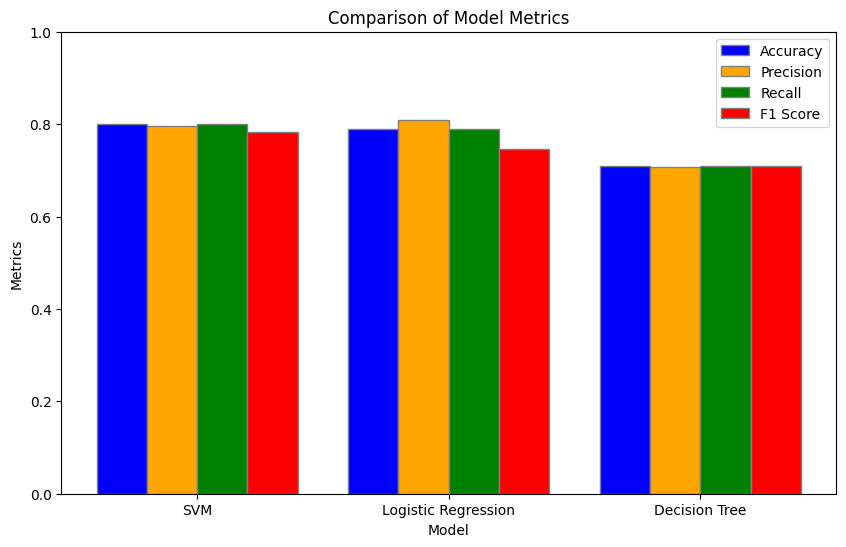

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Model': ['SVM', 'Logistic Regression', 'Decision Tree'],
    'Accuracy': [0.80, 0.79, 0.71],
    'Precision': [0.795, 0.810, 0.708],
    'F1 Score': [0.784, 0.747, 0.709],
    'Recall': [0.80, 0.79, 0.71]
}

df = pd.DataFrame(data)

bar_width = 0.2

r1 = range(len(df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(10, 6))

plt.bar(r1, df['Accuracy'], color='blue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, df['Precision'], color='orange', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, df['Recall'], color='green', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, df['F1 Score'], color='red', width=bar_width, edgecolor='grey', label='F1 Score')

plt.xlabel('Model')
plt.ylabel('Metrics')
plt.title('Comparison of Model Metrics')
plt.xticks([r + bar_width * 1.5 for r in range(len(df))], df['Model'])
plt.legend()
plt.ylim(0, 1)  # Set the y-axis limit to the range of metric values (0 to 1)
plt.show()


# **Heatmap**



---



---

A heatmap is a graphical representation of data where individual values in a matrix are represented as colors. In the context of model evaluation, a heatmap can provide a visual summary of performance metrics for different models across various criteria.


## Explanation
---

`Visualization Purpose:` The heatmap provides a visual summary of model performance. Each cell in the heatmap represents a specific metric for a particular model. The color intensity in each cell corresponds to the metric value, allowing for a quick comparison between models and their performance across different evaluation criteria. Higher values are usually represented by brighter colors, making it easy to identify models with stronger or weaker performance in specific metrics.


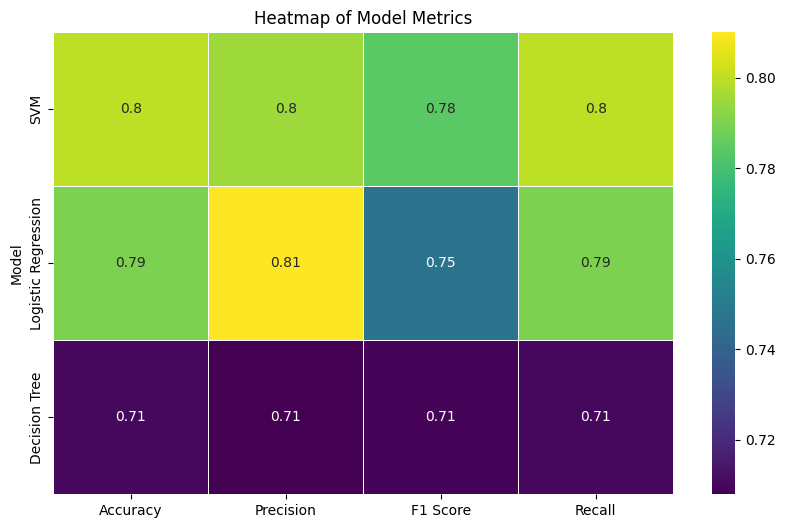

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Model': ['SVM', 'Logistic Regression', 'Decision Tree'],
    'Accuracy': [0.80, 0.79, 0.71],
    'Precision': [0.795, 0.810, 0.708],
    'F1 Score': [0.784, 0.747, 0.709],
    'Recall': [0.80, 0.79, 0.71]
}

df = pd.DataFrame(data)

# Set 'Model' as the index for the heatmap
df.set_index('Model', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='viridis', linewidths=.5)

plt.title('Heatmap of Model Metrics')
plt.show()
